In [3]:
import numpy as np 
import pandas as pd 
import gc
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import xception
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [4]:
pd.options.display.max_rows = 100

In [5]:
#defining directory paths
image_dir = '/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/fotos_manometro'
labels_dir = '/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/label.csv'

In [6]:
labels = pd.read_csv(labels_dir)
labels.describe()

,Clase_presion
count,500.00000
mean,0.87000
std,0.33664
min,0.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,1.00000


In [7]:
#distribution de clases de presion
labels.Clase_presion.value_counts(normalize=True)

1    0.87
0    0.13
Name: Clase_presion, dtype: float64

<PIL.Image.Image image mode=RGB size=300x300 at 0x7F93C07ADB90>


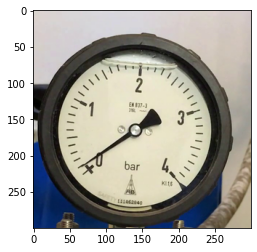

In [10]:
from PIL import Image
tot = Image.open('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/fotos_manometro/0.jpg')
tot.size
tot = tot.resize((300, 300), Image.ANTIALIAS)
tot.size
print(tot)
plt.imshow(tot)

In [27]:
os.path.join(sample_dir, )

'/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/fotos_manometro'

In [21]:
#preview of dataset
sample_dir = '/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/fotos_manometro'
fig = plt.figure(figsize=(20, 12))
plt.suptitle('ejemplo de dataset')
for i, file in enumerate(os.listdir(sample_dir)):
    img = image.load_img(os.path.join(sample_dir, file),
                         interpolation='box')
    img = img.resize((300, 300), Image.ANTIALIAS)
    img = image.img_to_array(img, dtype='float32')
    img /= 255.0
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title('Sample ' + str(i+1))

ValueError: ignored

Error in callback <function flush_figures at 0x7f9414ff3050> (for post_execute):


KeyboardInterrupt: ignored

In [34]:
#transforming labels to multi-label binary format
labels_df = pd.read_csv(labels_dir)
labels_df['Etiqueta'] = [x for x in labels_df.values]
#labels_df['tuples'] = [('presion' + str(x), 'val' + str(y)) for x,y in labels_df['tuples'].values]
labels_df = labels_df.drop(columns=['Clase_presion'])
# labels_df = labels_df.reset_index()
binarizer = MultiLabelBinarizer()
#y = binarizer.fit_transform(labels_df['tuples'])

In [35]:
labels_df

,Etiqueta
0,[0]
1,[0]
2,[0]
3,[0]
4,[0]
...,...
495,[0]
496,[0]
497,[0]
498,[0]


In [41]:
#preview of dataframe
labels_df.head()

,Etiqueta
0,[0]
1,[0]
2,[0]
3,[0]
4,[0]


In [43]:
#distribution of unique labels
labels_df['Etiqueta'].value_counts()[0]

435

In [45]:
#creating train-test split
train, test = train_test_split(labels_df, 
                               stratify=labels_df['Etiqueta'],
                               test_size=0.20,
                               random_state=42
                              )

train_idx, test_idx = list(train.index), list(test.index)

In [46]:
train_test_split(labels_df, 
                               stratify=labels_df['Etiqueta'],
                               test_size=0.20,
                               random_state=42
                              )

[    Etiqueta
 30       [1]
 435      [1]
 81       [1]
 402      [1]
 467      [0]
 ..       ...
 190      [1]
 96       [1]
 434      [1]
 116      [1]
 335      [1]
 
 [400 rows x 1 columns],     Etiqueta
 321      [1]
 316      [1]
 454      [1]
 222      [1]
 288      [1]
 83       [1]
 121      [1]
 371      [1]
 366      [1]
 226      [1]
 473      [0]
 313      [1]
 182      [1]
 387      [1]
 414      [1]
 61       [1]
 233      [1]
 234      [1]
 221      [1]
 408      [1]
 177      [1]
 70       [1]
 68       [1]
 55       [1]
 358      [1]
 449      [1]
 277      [1]
 452      [1]
 477      [0]
 73       [1]
 227      [1]
 183      [1]
 380      [1]
 228      [1]
 486      [0]
 291      [1]
 199      [1]
 309      [1]
 458      [0]
 463      [0]
 251      [1]
 238      [1]
 275      [1]
 303      [1]
 237      [1]
 410      [1]
 208      [1]
 18       [0]
 281      [1]
 399      [1]
 85       [1]
 74       [1]
 101      [1]
 14       [0]
 126      [1]
 489      [0]
 156    

In [47]:
random.shuffle(os.listdir(image_dir))

#Se tiene q modificar a partir de acá

In [48]:
def generate(image_directory, labels, train_idx=None, batch_size=64, size=(224, 224)):
    

    
   
    prebuilt_model = xception.Xception(include_top=True,                      
              weights='imagenet')                                            #loading prebuilt model
    
    xception_model = Model(inputs=prebuilt_model.input,        
                           outputs=prebuilt_model.layers[-2].output)         #repurposing prebuilt model for feature extraction
    
    
    
    while 1:
        
        if train_idx==None:
            image_filenames = os.listdir(image_directory)                    #obtaining list of image filenames
        else:
            image_filenames = [str(idx) + '.jpg' for idx in train_idx]
            
        random.shuffle(image_filenames)                                      #shuffling the list to add randomness every epoch

        
        image_batch = []                                                     #initializing empty image batch list
        labels_batch = []                                                    #initializing empty labels batch list
        
        for file in image_filenames:                                         #looping over all images in directory

            index = int(file.split('.')[0])                                  #extracting image number/index from filename
            
            img = image.load_img(os.path.join(image_directory, file),        #loading image
                                 target_size=size,
                                 interpolation='box')
            
            img_arr = image.img_to_array(img, dtype='float32')               #converting image to array
            
            label = labels[index]                                            #using image number/index to find correct label in dataframe
    
            image_batch.append(img_arr)                                      #appending the image to the batch
            labels_batch.append(label)                                       #appending the label to the batch

    
            if len(image_batch)==batch_size:                                 #check to see if batch has required size
                image_batch = np.array(image_batch)                          #converting image batch list to array
                image_batch = xception.preprocess_input(image_batch)         #using xception preprocessing on image batch array
                image_features = xception_model.predict(image_batch)         #using prebuilt xception model to extract features from batch
                image_batch = np.array(image_features)                       #converting features to array
                image_batch = image_batch.reshape(batch_size,                #reshaping feature array
                                                  image_features.shape[1])   
                labels_batch = np.array(labels_batch)                        #converting labels batch list to array
                yield image_batch, labels_batch                              #yielding image and labels batch array
                image_batch = []                                             #reinitializing the image batch
                labels_batch = []                                            #reinitializing the label batch
                gc.collect()                                                 #collecting garbage to free memory

In [49]:
#Defining training parameters
BATCH_SIZE = 256
IMAGE_SIZE = (299, 299) #this is the size suggested for Xception model
EPOCHS = 10
STEPS = int(len(train_idx) / BATCH_SIZE)

In [50]:
#testing generator
sample_generator = next(generate(image_directory=image_dir, 
                                 labels=y,
                                 train_idx=train_idx,
                                 batch_size=1, 
                                 size=IMAGE_SIZE))

91889664/91884032 [==============================] - 1s 0us/step


In [51]:
#output of generator
sample_generator

(array([[0.09863257, 0.29977405, 0.07994261, ..., 0.19985405, 0.20494843,
         0.2056117 ]], dtype=float32), array([[0, 1]]))

In [99]:
#extracting input and output dims from generator
INPUT_DIM = sample_generator[0][0].shape
OUTPUT_DIM = sample_generator[1].shape[1]

In [100]:
print(INPUT_DIM, OUTPUT_DIM)

(2048,) 2


In [54]:
def create_model(input_shape, output_shape):


    input_layer = Input(shape=input_shape)
    norm  = BatchNormalization()(input_layer)
    drop = Dropout(0.25)(norm)
    fc1 = Dense(256, activation='relu')(norm)
    fc2 = Dense(256, activation='relu')(fc1)
    output1 = Dense(output_shape, activation='sigmoid')(fc2)
    
    #contructing model from layers
    model = Model(inputs=input_layer,
                  outputs=output1)
    
    #compiling model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )
    
    return model

In [55]:
#creating instance of model
model = create_model(input_shape=INPUT_DIM,
                     output_shape=OUTPUT_DIM)

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2048)]            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 599,042
Trainable params: 594,946
Non-trainable params: 4,096
_________________________________________________________________


In [57]:
#initializing generator for training
generator = generate(image_directory=image_dir,
                     labels=y,
                     train_idx=train_idx,
                     batch_size=BATCH_SIZE, 
                     size=IMAGE_SIZE)

In [58]:
#fitting model
history = model.fit(generator, 
                    epochs=EPOCHS, 
                    steps_per_epoch=STEPS)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6427 - accuracy: 0.7461
Epoch 2/10
1/1 [==============================] - 83s 83s/step - loss: 0.2230 - accuracy: 0.9453
Epoch 3/10
1/1 [==============================] - 87s 87s/step - loss: 0.1067 - accuracy: 0.9688
Epoch 4/10
1/1 [==============================] - 87s 87s/step - loss: 0.0520 - accuracy: 0.9922
Epoch 5/10
1/1 [==============================] - 81s 81s/step - loss: 0.0364 - accuracy: 0.9883
Epoch 6/10
1/1 [==============================] - 87s 87s/step - loss: 0.0247 - accuracy: 0.9922
Epoch 7/10
1/1 [==============================] - 87s 87s/step - loss: 0.0113 - accuracy: 0.9961
Epoch 8/10
1/1 [==============================] - 87s 87s/step - loss: 0.0228 - accuracy: 0.9883
Epoch 9/10
1/1 [==============================] - 80s 80s/step - loss: 0.0156 - accuracy: 0.9883
Epoch 10/10
1/1 [==============================] - 80s 80s/step - loss: 0.0088 - accuracy: 0.9961


In [134]:
def predict(image_directory, indices=None, plot=False):
    
    
    images_list = []
    
    prebuilt_model = xception.Xception(include_top=True,
                                       weights='imagenet')           #loading pre-built model
    
    xception_model = Model(inputs=prebuilt_model.input,
                           outputs=prebuilt_model.layers[-2].output) #repurposing pre-built model for feature extraction
    
    if indices!=None:
        image_filenames = [str(idx) + '.jpg' for idx in indices]
    else:
        image_filenames = os.listdir(image_directory)
    
    if plot:
        dim = int(np.ceil(np.sqrt(len(image_filenames))))
        fig, axs = plt.subplots(nrows=dim, 
                                ncols=dim,
                                figsize=(20, 14))
        plt.suptitle('Ejemplo de predicciones del modelo', fontsize=32)
        
#         axs = axs.flatten()
        
    
    #looping over all images in path
    for i, file in enumerate(image_filenames):
        

        img = image.load_img(os.path.join(image_directory,
                                          file))
        img = img.resize((299, 299), Image.ANTIALIAS)                    
        img_arr = image.img_to_array(img, dtype='float32')           
    
        if plot:
            axs.flat[i].imshow(img_arr/255.0)
            
        images_list.append(img_arr)
        gc.collect()       
    
    print('preprocesamiento...')
    images_list = np.array(images_list)
    img_arr = xception.preprocess_input(images_list)              
    print('extraer características...')
    img_features = xception_model.predict(img_arr)                  
    img_features = np.array(img_features)
    print('prediciendo...')
    prediction = model.predict(img_features)                                            
    Clase_presion_max = np.argmax(prediction[:, :2], axis=1)   
    #Clase_presion_max = np.argmax(prediction[:, :2], axis=1)                 
   
    prediction_list = [x for x in list(zip(Clase_presion_max))]
    #prediction_list = [binarizer.classes_[x] for x in list(zip(Clase_presion_max))]

    if plot:                                                        
        for i, v in enumerate(prediction_list):
            axs.flat[i].set_title('La clase predecida es:' + str(v[0]))
            axs.flat[i].axis('off')
        for j in range(i+1, dim**2):                                 
              fig.delaxes(axs.flat[j])
            
    return prediction_list

preprocesamiento...
extraer características...
prediciendo...


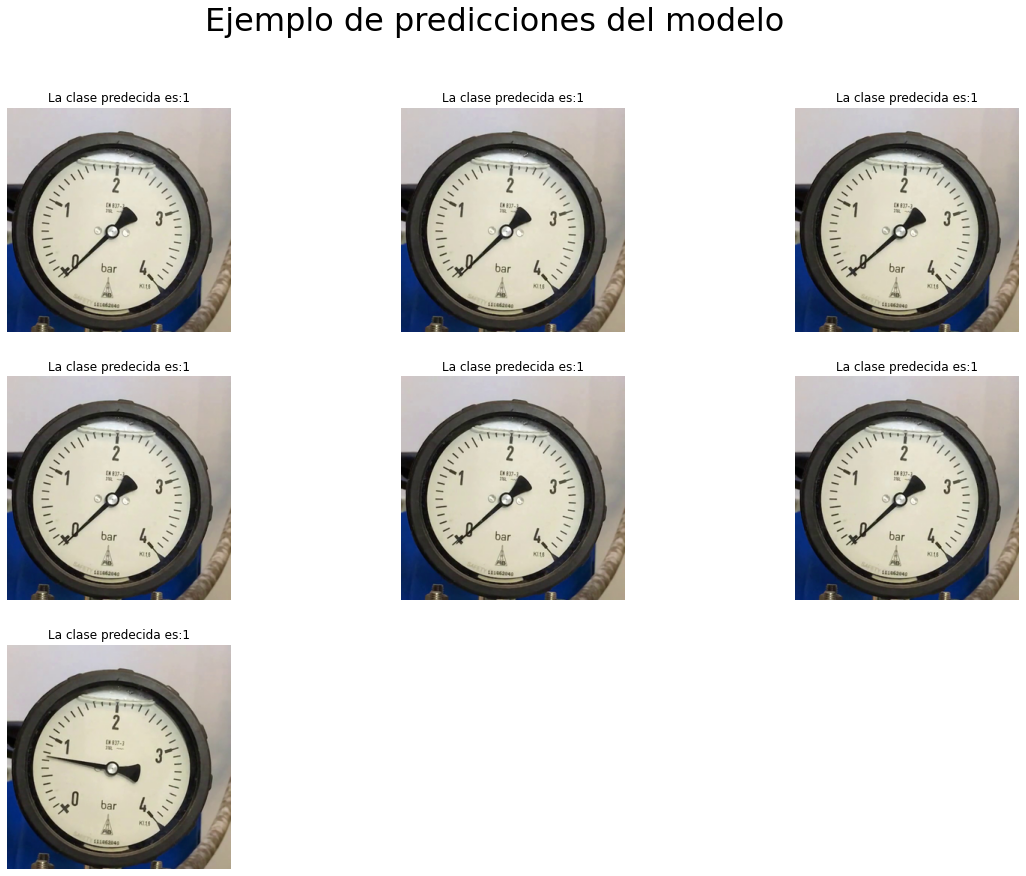

In [135]:
# predicción de muestras utilizadas en la visualización anterior
predictions = predict('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/samples',
                        plot=True)

preprocesamiento...
extraer características...
prediciendo...


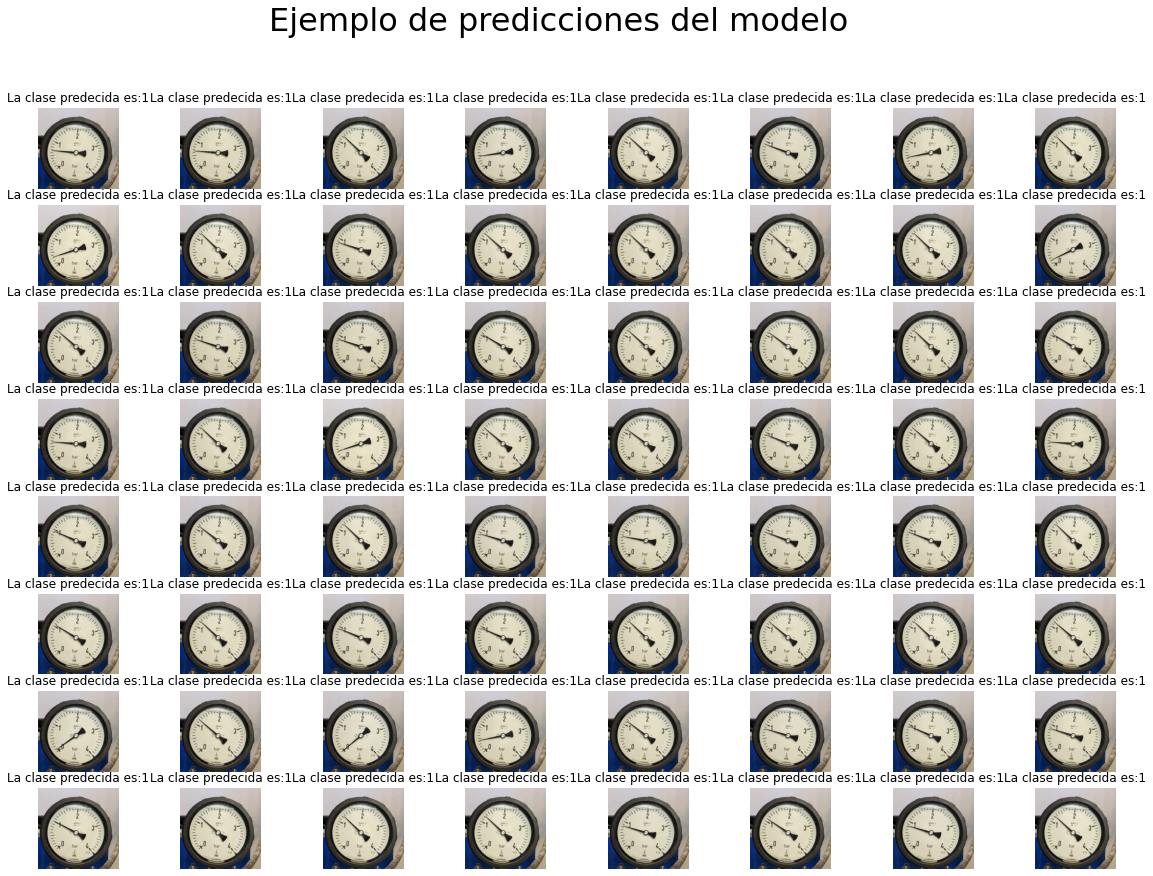

In [136]:
# muestra de predicción del conjunto de prueba (samples x fos manom)
predictions = predict('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/fotos_manometro',
                        indices=sample_test,
                        plot=True)

In [77]:
# tomar una muestra del conjunto de prueba para visualizar los resultados en datos no vistos
# esto se hace por limitaciones de memoria
SIZE = 64
sample_test = list(np.random.choice(test_idx, size=SIZE))

In [139]:
sample_results = pd.DataFrame(list(zip(labels_df.loc[sample_test]['Etiqueta'].values, pd.Series(predictions))), columns=['Actual', 'Predicted'])
sample_results

,Actual,Predicted
0,[1],"(1,)"
1,[1],"(1,)"
2,[1],"(1,)"
3,[0],"(1,)"
4,[1],"(1,)"
5,[1],"(1,)"
6,[0],"(1,)"
7,[1],"(1,)"
8,[0],"(1,)"
9,[1],"(1,)"
